In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import torch
from torch import nn
from torch.nn import functional as F

In [3]:
class MyModule(nn.Module):
  def __init__(self):
    super().__init__()
    # some init for my module

  def forward(self, x):
    # function for performing the calculation of the module
    pass

In [4]:
class SimpleClassifier(nn.Module):
  def __init__(self, num_inputs, num_hidden, num_outputs):
    super().__init__()
    # initialize the modules we need to build up
    self.linear1 = nn.Linear(num_inputs, num_hidden)
    self.act_fn = nn.Tanh()
    self.linear2 = nn.Linear(num_hidden, num_outputs)

  def forward(self, x):
    # perform calculation of the model to determine the prediction
    x = self.linear1(x)
    x = self.act_fn(x)
    x = self.linear2(x)
    return x

In [5]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


In [6]:
for name, param in model.named_parameters():
  print(f"Parameter {name}, shape: {param} ")

Parameter linear1.weight, shape: Parameter containing:
tensor([[ 0.1872, -0.3574],
        [ 0.0492, -0.6670],
        [ 0.5169,  0.1410],
        [ 0.1331, -0.6289]], requires_grad=True) 
Parameter linear1.bias, shape: Parameter containing:
tensor([ 0.5624, -0.0778, -0.3109, -0.2610], requires_grad=True) 
Parameter linear2.weight, shape: Parameter containing:
tensor([[-0.2092, -0.4520,  0.1746,  0.1812]], requires_grad=True) 
Parameter linear2.bias, shape: Parameter containing:
tensor([0.3492], requires_grad=True) 


In [7]:
from torch.utils.data import Dataset, DataLoader

In [8]:
class XORDataset(Dataset):
  def __init__(self, size, std=0.1):
    super().__init__()
    self.size = size
    self.std = std
    self.generate_continuous_xor()

  def generate_continuous_xor(self):
    data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
    label = (data.sum(dim=1) == 1).to(torch.long)
    data += self.std * torch.randn(data.shape)
    self.data = data
    self.label = label

  def __len__(self):
    return self.size

  def __getitem__(self, idx):
    data_point = self.data[idx]
    data_label = self.label[idx]
    return data_point, data_label



In [11]:
sample = XORDataset(size=15)
sample.__len__()

15

In [16]:
sample.size

15

In [17]:
sample.data

tensor([[-2.5650e-03,  3.8005e-03],
        [-1.3243e-01,  1.0583e+00],
        [-3.7935e-02, -2.4346e-02],
        [-1.4511e-01,  1.0971e+00],
        [ 1.1265e+00,  6.8785e-02],
        [-1.5977e-04,  2.2299e-01],
        [ 1.1888e+00,  9.4391e-02],
        [-9.6272e-02,  8.8566e-01],
        [ 1.1274e+00, -1.4276e-01],
        [-6.8485e-02, -5.6406e-02],
        [ 9.6741e-01,  1.0531e+00],
        [-7.6459e-03,  9.1569e-01],
        [ 1.0705e+00, -1.9998e-01],
        [ 1.0490e+00,  1.9576e-01],
        [ 9.6207e-01,  1.0551e+00]])

In [18]:
sample.label

tensor([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [21]:
x = sample.data[sample.label == 1]
x

tensor([[-0.1324,  1.0583],
        [-0.1451,  1.0971],
        [ 1.1265,  0.0688],
        [ 1.1888,  0.0944],
        [-0.0963,  0.8857],
        [ 1.1274, -0.1428],
        [-0.0076,  0.9157],
        [ 1.0705, -0.2000],
        [ 1.0490,  0.1958]])

In [23]:
y = sample.data[sample.data.sum(dim = 1) > 0.8]
y

tensor([[-0.1324,  1.0583],
        [-0.1451,  1.0971],
        [ 1.1265,  0.0688],
        [ 1.1888,  0.0944],
        [ 1.1274, -0.1428],
        [ 0.9674,  1.0531],
        [-0.0076,  0.9157],
        [ 1.0705, -0.2000],
        [ 1.0490,  0.1958],
        [ 0.9621,  1.0551]])

In [27]:
z = (sample.data.sum(dim=1) > 1)
z

tensor([False, False, False, False,  True, False,  True, False, False, False,
         True, False, False,  True,  True])

In [28]:
t = (sample.data.sum(dim=1) > 1).to(torch.long)
t

tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1])

In [29]:
dataset = XORDataset(size=200)
print(f"Size of the dataset: {len(dataset)}")
print(f"Data point 0: {dataset[0]}")

Size of the dataset: 200
Data point 0: (tensor([0.8909, 0.9354]), tensor(0))


In [30]:
import matplotlib.pyplot as plt
from torch import Tensor

In [31]:
def visualize_samples(data, label):
  if isinstance(data, Tensor):
    data = data.cpu().numpy()
  if isinstance(label, Tensor):
    label = label.cpu().numpy()

  data_0 = data[label == 0]
  data_1 = data[label == 1]

  plt.figure(figsize=(4,4))
  plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="Class 0")
  plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
  plt.title("Dataset Samples")
  plt.ylabel(r"$x_2$")
  plt.xlabel(r"$x_1$")
  plt.legend()


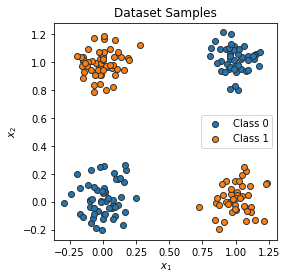

In [32]:
visualize_samples(dataset.data, dataset.label)
plt.show()

In [33]:
dataset.__len__()

200

In [34]:
dataset.__getitem__(17)

(tensor([-0.0877, -0.1530]), tensor(0))

In [35]:
data_loader = DataLoader(dataset, batch_size=8, shuffle=True)

data_inputs, data_labels = next(iter(data_loader))

print(f"Data inputs: {data_inputs.shape} \n {data_inputs}")
print(f"Data labels: {data_labels.shape} \n {data_labels}")

Data inputs: torch.Size([8, 2]) 
 tensor([[ 0.9366,  0.9914],
        [ 1.1154, -0.0747],
        [-0.0515, -0.1867],
        [ 0.0941,  0.9115],
        [ 0.9644,  1.1340],
        [ 1.1180, -0.0355],
        [ 0.1677,  0.2639],
        [ 1.0151,  1.0604]])
Data labels: torch.Size([8]) 
 tensor([0, 1, 0, 1, 0, 1, 0, 0])


In [37]:
loss_module = nn.BCEWithLogitsLoss()

In [38]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [39]:
train_dataset = XORDataset(size=1000)
train_data_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

In [40]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)
model.to(device)

cuda


SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

In [41]:
from tqdm import tqdm

def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
  model.train()

  for epoch in tqdm(range(num_epochs)):
    for data_inputs, data_labels in data_loader:
      # step 1 : load a batch
      data_inputs = data_inputs.to(device)
      data_labels = data_labels.to(device)

      # step 2: obtain the predictions
      preds = model(data_inputs)
      preds = preds.squeeze(dim=1)

      # step 3: calculate the loss
      loss = loss_module(preds, data_labels.float())

      # step 4: backpropagation
      optimizer.zero_grad()
      loss.backward()

      # step 5: update the parameters
      optimizer.step()

In [42]:
train_model(model, optimizer, train_data_loader, loss_module)

100%|██████████| 100/100 [00:03<00:00, 25.05it/s]


In [43]:
state_dict = model.state_dict()
state_dict

OrderedDict([('linear1.weight', tensor([[ 2.6025, -2.0363],
                      [-1.6820, -1.6764],
                      [ 0.5326,  0.2019],
                      [ 1.9209, -2.5364]], device='cuda:0')),
             ('linear1.bias',
              tensor([ 0.9263,  0.1355, -0.2471, -0.8474], device='cuda:0')),
             ('linear2.weight',
              tensor([[-3.0458, -2.2685, -0.1366,  2.9618]], device='cuda:0')),
             ('linear2.bias', tensor([0.9369], device='cuda:0'))])

In [44]:
torch.save(state_dict, "/content/drive/MyDrive/Checkpoints/lightning_logs/XORModel.tar")

In [45]:
# load state_dict from drive 
state_dict = torch.load("/content/drive/MyDrive/Checkpoints/lightning_logs/XORModel.tar")

# create a new model and load the state
new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)

# verify that parameters are the same
print(f"Original model: \n{model.state_dict()}")
print(f"\nLoaded model: \n{new_model.state_dict()}")

Original model: 
OrderedDict([('linear1.weight', tensor([[ 2.6025, -2.0363],
        [-1.6820, -1.6764],
        [ 0.5326,  0.2019],
        [ 1.9209, -2.5364]], device='cuda:0')), ('linear1.bias', tensor([ 0.9263,  0.1355, -0.2471, -0.8474], device='cuda:0')), ('linear2.weight', tensor([[-3.0458, -2.2685, -0.1366,  2.9618]], device='cuda:0')), ('linear2.bias', tensor([0.9369], device='cuda:0'))])

Loaded model: 
OrderedDict([('linear1.weight', tensor([[ 2.6025, -2.0363],
        [-1.6820, -1.6764],
        [ 0.5326,  0.2019],
        [ 1.9209, -2.5364]])), ('linear1.bias', tensor([ 0.9263,  0.1355, -0.2471, -0.8474])), ('linear2.weight', tensor([[-3.0458, -2.2685, -0.1366,  2.9618]])), ('linear2.bias', tensor([0.9369]))])


In [46]:
test_dataset = XORDataset(size=500)
test_data_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

In [49]:
def eval_model(model, data_loader):
  model.eval()
  true_preds, num_preds = 0.0, 0.0

  with torch.no_grad():
    for data_inputs, data_labels in data_loader:
      data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
      preds = model(data_inputs)
      preds = preds.squeeze(dim=1)
      preds = torch.sigmoid(preds)
      pred_labels = (preds >= 0.5).long()

      true_preds += (pred_labels == data_labels).sum()
      num_preds +=data_labels.shape[0]

  acc = true_preds / num_preds
  print(f"Accuracy of the model: {100.0*acc:4.2f}%")
      


In [50]:
eval_model(model, test_data_loader)

Accuracy of the model: 100.00%
